# Proyecto Minería de datos con IA
Autor: Julian Moreno

# ¿Qué factores influyen más en la cantidad vendida de un producto?

In [3]:
import pandas as pd
import random
import numpy as np

# Semillas para reproducibilidad
random.seed(42)
np.random.seed(42)

# -----------------------------
# Definición de productos
# (id, nombre, categoría, rango de precios)
# -----------------------------
productos = [
    (1, "Laptop", "Tecnologia", (2500, 4500)),
    (2, "Mouse", "Tecnologia", (30, 120)),
    (3, "Teclado", "Tecnologia", (80, 250)),
    (4, "Monitor", "Tecnologia", (600, 1800)),
    (5, "Impresora", "Oficina", (700, 2200)),
    (6, "Tablet", "Tecnologia", (900, 2500)),
    (7, "Celular", "Tecnologia", (1200, 4000)),
    (8, "Audífonos", "Tecnologia", (60, 350))
]

# -----------------------------
# Vendedores
# -----------------------------
vendedores = [
    "Juan Perez",
    "Maria Lopez",
    "Carlos Gómez",
    "Ana Torres",
    "Luis Rodríguez"
]

# -----------------------------
# Ciudades con errores de escritura
# -----------------------------
ciudades = [
    "Bogotá", "bogota", "Bogota", "Bgotá",
    "Medellín", "Medelin", "medellin",
    "Cali", "caly",
    "Barranquilla", "Barranquila"
]

# -----------------------------
# Fechas
# -----------------------------
fechas = pd.date_range(start="2024-01-01", periods=90, freq="D")

# -----------------------------
# Generación de datos
# -----------------------------
data = []

for _ in range(100):
    prod = random.choice(productos)
    precio_base = round(random.uniform(*prod[3]), 2)

    fila = {
        "fecha": random.choice(fechas),
        "id_producto": prod[0],
        "nombre_producto": prod[1],
        "categoria": prod[2],
        "precio": random.choice([
            precio_base, precio_base, precio_base, None  # pocos NaN
        ]),
        "ciudad": random.choice(ciudades),
        "nombre_vendedor": random.choice(vendedores + [None]),
        "cantidad_vendida": random.choice([
            random.randint(1, 20),
            random.randint(5, 50),
            None  # pocos NaN
        ])
    }

    data.append(fila)

# -----------------------------
# DataFrame final
# -----------------------------
df_ventas = pd.DataFrame(data)

# Mostrar primeras filas
df_ventas.head(50)


,fecha,id_producto,nombre_producto,categoria,precio,ciudad,nombre_vendedor,cantidad_vendida
0,2024-02-05,2,Mouse,Tecnologia,32.25,Bgotá,Maria Lopez,NaN
1,2024-01-05,2,Mouse,Tecnologia,83.14,bogota,Maria Lopez,NaN
2,2024-03-24,1,Laptop,Tecnologia,NaN,Bgotá,Ana Torres,19.0
3,2024-02-13,3,Teclado,Tecnologia,198.68,Bogota,Maria Lopez,11.0
4,2024-02-14,7,Celular,Tecnologia,1470.81,Bogotá,None,15.0
5,2024-02-07,7,Celular,Tecnologia,1420.64,Barranquilla,Maria Lopez,NaN
6,2024-01-11,4,Monitor,Tecnologia,1527.68,bogota,Ana Torres,NaN
7,2024-02-15,6,Tablet,Tecnologia,1160.25,Barranquila,Carlos Gómez,NaN
8,2024-02-01,3,Teclado,Tecnologia,170.80,Cali,Ana Torres,NaN
9,2024-01-08,4,Monitor,Tecnologia,1421.54,Bogotá,Carlos Gómez,13.0


# Limpieza del Dataset

In [4]:
import pandas as pd
import numpy as np

# =====================================================
# 1. COPIA DE SEGURIDAD DEL DATASET ORIGINAL
# =====================================================
df = df_ventas.copy()

# =====================================================
# 2. INSPECCIÓN INICIAL
# =====================================================
print("Información inicial:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

# =====================================================
# 3. LIMPIEZA DE VARIABLES DE TEXTO
# =====================================================

# --- Limpieza de ciudades ---
df["ciudad"] = (
    df["ciudad"]
    .str.lower()
    .str.strip()
)

df["ciudad"] = df["ciudad"].replace({
    "bogota": "bogotá",
    "bgotá": "bogotá",
    "medelin": "medellín",
    "medellin": "medellín",
    "caly": "cali",
    "barranquila": "barranquilla"
})

# Capitalizar primera letra
df["ciudad"] = df["ciudad"].str.capitalize()

# --- Limpieza de categoría ---
df["categoria"] = (
    df["categoria"]
    .str.lower()
    .str.strip()
)

df["categoria"] = df["categoria"].replace({
    "tecnologia": "tecnología"
})

# =====================================================
# 4. TRATAMIENTO DE VALORES NULOS
# =====================================================

# --- Precio: imputación por mediana según producto ---
df["precio"] = df.groupby("nombre_producto")["precio"] \
                  .transform(lambda x: x.fillna(x.median()))

# --- Cantidad vendida: imputación con mediana global ---
df["cantidad_vendida"] = df["cantidad_vendida"].fillna(
    df["cantidad_vendida"].median()
)

# --- Vendedor: valor por defecto ---
df["nombre_vendedor"] = df["nombre_vendedor"].fillna("No asignado")

# =====================================================
# 5. ELIMINACIÓN DE VALORES INVÁLIDOS
# =====================================================

df = df[df["cantidad_vendida"] > 0]
df = df[df["precio"] > 0]

# =====================================================
# 6. VERIFICACIÓN FINAL
# =====================================================
print("\nInformación después de la limpieza:")
print(df.info())

print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())

print("\nResumen estadístico:")
print(df.describe())

# El DataFrame df queda listo para usar en regresión


Información inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             100 non-null    datetime64[ns]
 1   id_producto       100 non-null    int64         
 2   nombre_producto   100 non-null    object        
 3   categoria         100 non-null    object        
 4   precio            77 non-null     float64       
 5   ciudad            100 non-null    object        
 6   nombre_vendedor   87 non-null     object        
 7   cantidad_vendida  64 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.4+ KB
None

Valores nulos por columna:
fecha                0
id_producto          0
nombre_producto      0
categoria            0
precio              23
ciudad               0
nombre_vendedor     13
cantidad_vendida    36
dtype: int64

Información después de l

In [5]:
df.head(50)

,fecha,id_producto,nombre_producto,categoria,precio,ciudad,nombre_vendedor,cantidad_vendida
0,2024-02-05,2,Mouse,tecnología,32.250,Bogotá,Maria Lopez,16.5
1,2024-01-05,2,Mouse,tecnología,83.140,Bogotá,Maria Lopez,16.5
2,2024-03-24,1,Laptop,tecnología,3751.090,Bogotá,Ana Torres,19.0
3,2024-02-13,3,Teclado,tecnología,198.680,Bogotá,Maria Lopez,11.0
4,2024-02-14,7,Celular,tecnología,1470.810,Bogotá,No asignado,15.0
5,2024-02-07,7,Celular,tecnología,1420.640,Barranquilla,Maria Lopez,16.5
6,2024-01-11,4,Monitor,tecnología,1527.680,Bogotá,Ana Torres,16.5
7,2024-02-15,6,Tablet,tecnología,1160.250,Barranquilla,Carlos Gómez,16.5
8,2024-02-01,3,Teclado,tecnología,170.800,Cali,Ana Torres,16.5
9,2024-01-08,4,Monitor,tecnología,1421.540,Bogotá,Carlos Gómez,13.0


# Exportar el Dataset Limpio

In [13]:
# =====================================================
# EXPORTAR DATASET LIMPIO A CSV
# =====================================================

# Guardar el DataFrame limpio en un archivo CSV
df.to_csv(
    "dataset_limpio_ventas.csv",
    index=False,
    encoding="utf-8-sig"
)

print("Archivo CSV guardado correctamente ✅")


Archivo CSV guardado correctamente ✅


# Modelo de Regresión

In [7]:
# =====================================================
# 0. LIBRERÍAS
# =====================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# =====================================================
# 1. INGENIERÍA DE VARIABLES
#    Se crean variables más informativas
# =====================================================

# Ingreso por venta
df["ingreso"] = df["precio"] * df["cantidad_vendida"]

# Variable temporal: mes
df["mes"] = pd.to_datetime(df["fecha"]).dt.month

# =====================================================
# 2. SELECCIÓN DE VARIABLES
#    Objetivo:
#    - Explicar qué factores influyen en la cantidad vendida
# =====================================================

# Variable objetivo
y = df["cantidad_vendida"]

# Variables explicativas
X = df[
    [
        "precio",
        "ingreso",
        "mes",
        "categoria",
        "ciudad",
        "nombre_vendedor"
    ]
]

# =====================================================
# 3. DEFINICIÓN DE TIPOS DE VARIABLES
# =====================================================

# Variables numéricas
num_features = ["precio", "ingreso", "mes"]

# Variables categóricas
cat_features = ["categoria", "ciudad", "nombre_vendedor"]

# =====================================================
# 4. PREPROCESAMIENTO
#    - Numéricas: se pasan tal cual
#    - Categóricas: One-Hot Encoding
# =====================================================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(drop="first"), cat_features)
    ]
)

# =====================================================
# 5. DEFINICIÓN DEL MODELO
#    Random Forest:
#    - Captura relaciones no lineales
#    - Robusto a ruido
#    - Mejor desempeño con pocos datos
# =====================================================

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=2
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", model)
])

# =====================================================
# 6. DIVISIÓN TRAIN / TEST
# =====================================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# =====================================================
# 7. ENTRENAMIENTO DEL MODELO
# =====================================================

pipeline.fit(X_train, y_train)

# =====================================================
# 8. EVALUACIÓN DEL MODELO
# =====================================================

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² del modelo:", round(r2, 3))

# =====================================================
# 9. IMPORTANCIA DE VARIABLES
#    Aquí respondemos la pregunta principal
# =====================================================

# Obtener nombres finales de variables
feature_names = (
    num_features +
    list(
        pipeline.named_steps["preprocessing"]
        .named_transformers_["cat"]
        .get_feature_names_out(cat_features)
    )
)

# Importancia de variables del Random Forest
importances = pipeline.named_steps["model"].feature_importances_

impacto_factores = pd.DataFrame({
    "factor": feature_names,
    "importancia": importances
}).sort_values(by="importancia", ascending=False)

print("\nFactores que más influyen en la cantidad vendida:")
print(impacto_factores)

# =====================================================
# 10. INTERPRETACIÓN
# =====================================================
# - La importancia indica cuánto contribuye una variable
#   a reducir el error del modelo
# - Valores más altos = mayor influencia
# - El ranking es más importante que el valor exacto
# =====================================================


R² del modelo: 0.622

Factores que más influyen en la cantidad vendida:
                            factor  importancia
1                          ingreso     0.548035
0                           precio     0.298432
2                              mes     0.039328
9   nombre_vendedor_Luis Rodríguez     0.028016
5                      ciudad_Cali     0.026160
3             categoria_tecnología     0.012184
7     nombre_vendedor_Carlos Gómez     0.009515
4                    ciudad_Bogotá     0.009230
8       nombre_vendedor_Juan Perez     0.008914
11     nombre_vendedor_No asignado     0.007439
6                  ciudad_Medellín     0.007179
10     nombre_vendedor_Maria Lopez     0.005566


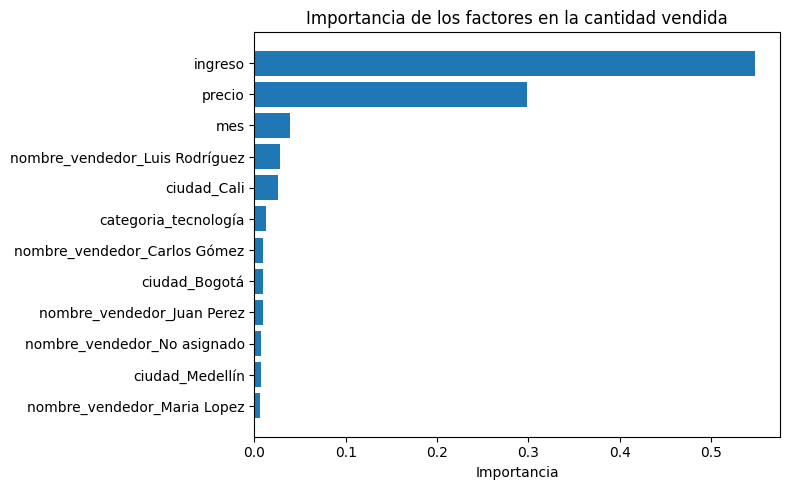

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    impacto_factores["factor"],
    impacto_factores["importancia"]
)
plt.xlabel("Importancia")
plt.title("Importancia de los factores en la cantidad vendida")
plt.gca().invert_yaxis()  # el más importante arriba
plt.tight_layout()
plt.show()


# Conclusión

El modelo Random Forest explica aproximadamente el 62% de la variabilidad en la cantidad vendida. Los resultados indican que el ingreso y el precio son los factores más influyentes, lo que evidencia relaciones no lineales entre el valor económico de la venta y el volumen comercializado. Factores temporales, como el mes, así como variables contextuales como la ciudad y el vendedor, tienen un impacto secundario. En conjunto, estos hallazgos sugieren que las decisiones de pricing tienen mayor efecto en las ventas que los factores operativos.